In [15]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [16]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [17]:
# 添加缺失的vwap字段（如果未提供）
if 'vwap' not in df.columns:
    df['vwap'] = df['turnover'] / df['volume']

In [18]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [19]:
# 因子2：成交量加权的上影线因子（KUP1_VW）
def calculate_kup1_vw(df, volume_window=12):
    """
    用成交量加权上影线因子，放量上影线更具意义
    公式：KUP1_VW = (high - max(open, close)) * volume_ratio / open
    原理：放量上影线表明真实阻力
    """
    # 计算成交量比率（当前成交量/平均成交量）
    df['volume_ma'] = df['volume'].rolling(volume_window).mean()
    df['volume_ratio'] = df['volume'] / df['volume_ma']
    
    max_open_close = np.maximum(df['open'], df['close'])
    upper_shadow = df['high'] - max_open_close
    return (upper_shadow * df['volume_ratio']) / df['open']

# 因子测试

In [20]:
evaluator.set_factor(
    factor_data_or_func=calculate_kup1_vw,
    factor_name='calculate_kup1_vw'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.008748
   Rank_IC (Spearman): 0.007806
📊 信息比率:
   IR: 0.663835
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130734
   因子列: calculate_kup1_vw
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


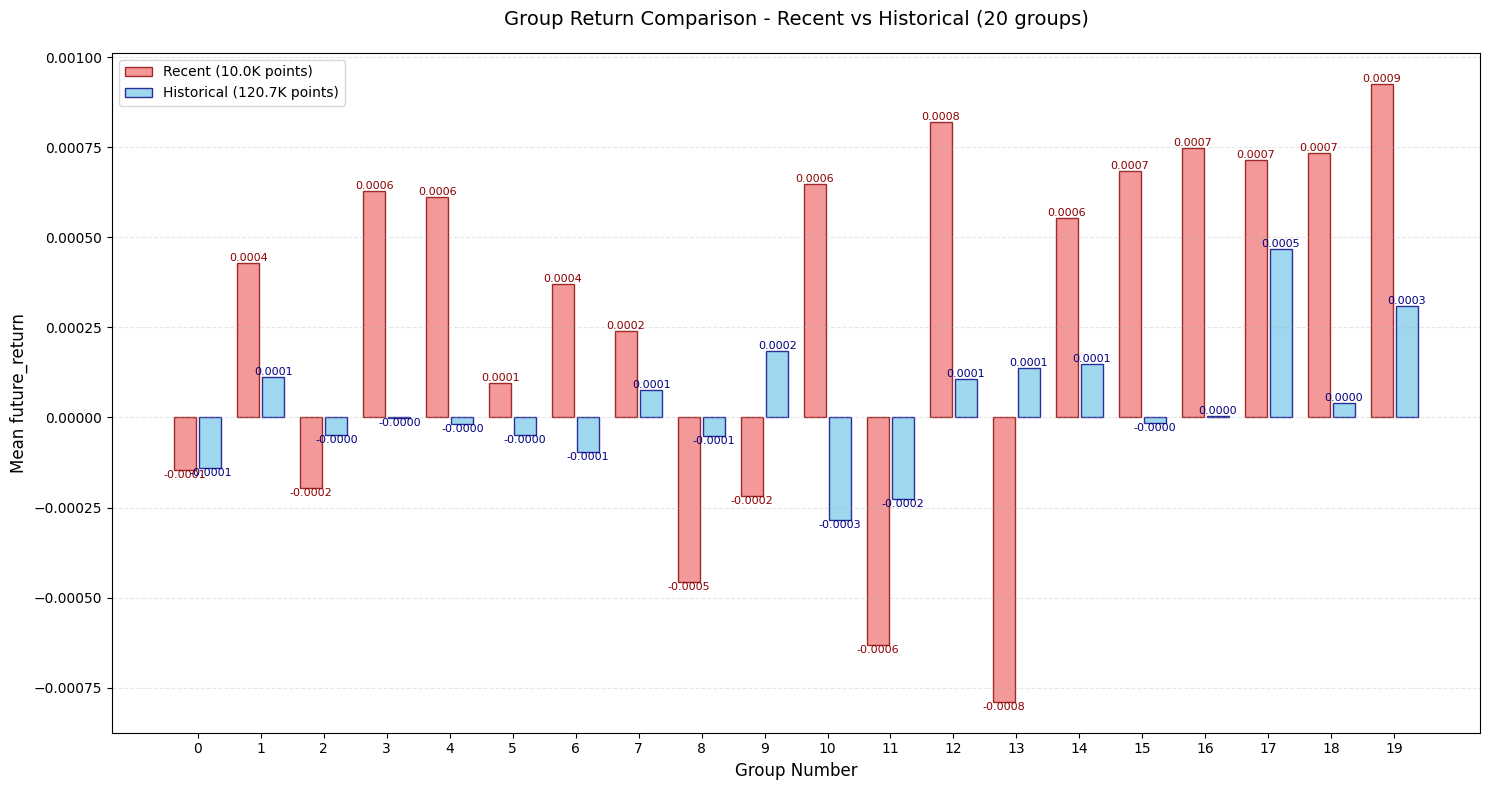

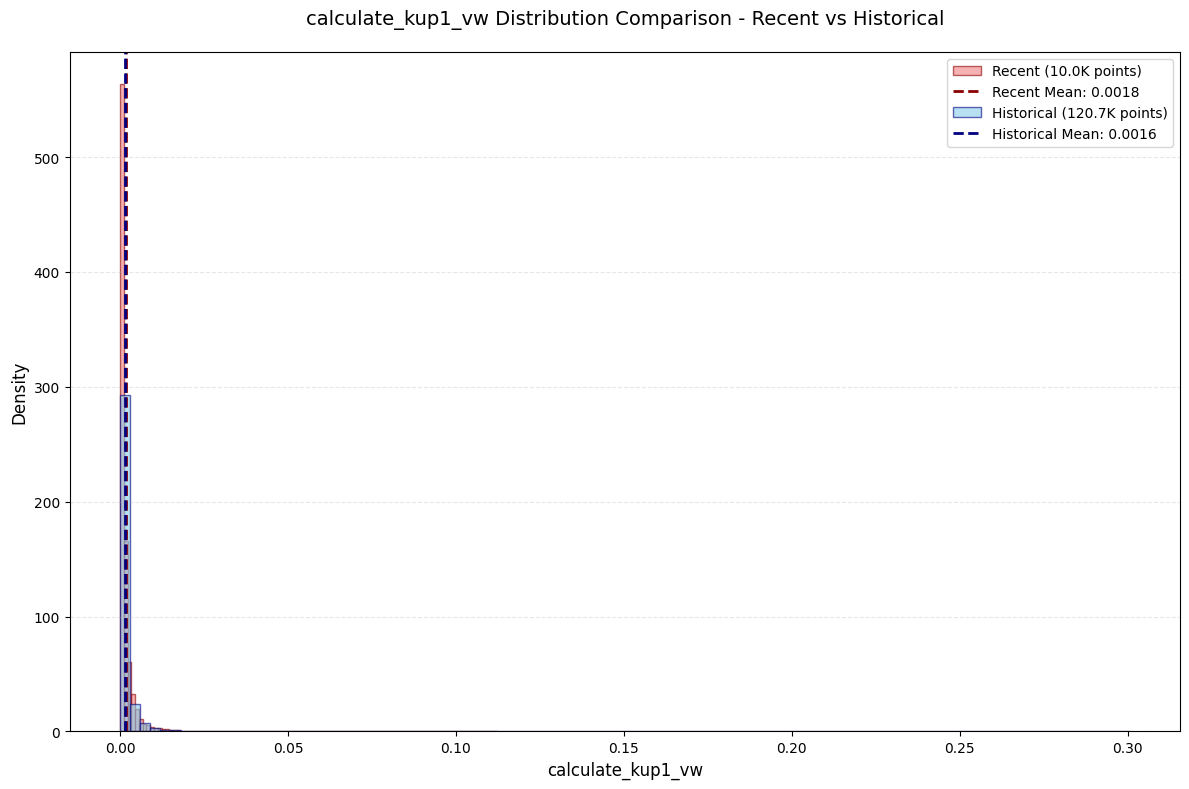

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [21]:
result=evaluator.run_full_evaluation(run_stationarity_test=False)